In [5]:
# Install necessary libraries
#!pip install opencv-python
#!pip install pillow
#!pip install patchify



# Import libraries
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random







  Using cached patchify-0.2.3-py3-none-any.whl.metadata (3.0 kB)
Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)


In [6]:
import os
from PIL import Image

dataset_root_folder = r'C:\Users\abudh\Downloads'
dataset_name = 'Semantic segmentation dataset'

for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    if dir_name == 'images':  # Change to 'masks' if looking for mask images
        print(f"Directory: {path}")
        images = [f for f in files if f.endswith('.png')]  # Change to '.jpg' if needed
        #images = os.listdir(path)
        #print(images)

        for i, image_name in enumerate(images):
            image_path = os.path.join(path, image_name)
            print(f"Image: {image_path}")
            # Open and display the image
            image = Image.open(image_path)
            image.show()


Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 1\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 2\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 3\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 4\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 5\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 6\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 7\images
Directory: C:\Users\abudh\Downloads\Semantic segmentation dataset\Tile 8\images


In [7]:
image_patch_size = 256


In [8]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)


In [9]:
image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]

In [10]:
image.shape
(image.shape[0]//image_patch_size) *image_patch_size
print(type(image))


<class 'numpy.ndarray'>


In [11]:
print(type(Image.fromarray(image)))

<class 'PIL.Image.Image'>


In [12]:
image.shape
(image.shape[0]//image_patch_size) *image_patch_size
print(type(image))


<class 'numpy.ndarray'>


In [13]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3) , step = image_patch_size)
image_patches


array([[[[[[ 57,  72,  81],
           [ 50,  65,  74],
           [ 72,  84,  94],
           ...,
           [186, 186, 186],
           [224, 227, 225],
           [214, 215, 211]],

          [[ 53,  67,  79],
           [ 60,  75,  84],
           [ 82,  94, 106],
           ...,
           [148, 148, 148],
           [216, 217, 215],
           [202, 203, 201]],

          [[ 67,  78,  92],
           [101, 113, 125],
           [107, 116, 130],
           ...,
           [114, 114, 114],
           [221, 222, 220],
           [173, 174, 172]],

          ...,

          [[ 97,  98, 108],
           [ 72,  73,  83],
           [ 74,  74,  86],
           ...,
           [ 65,  66,  76],
           [ 70,  72,  83],
           [ 71,  71,  83]],

          [[ 92,  91, 100],
           [ 88,  90,  98],
           [ 95,  96, 106],
           ...,
           [ 74,  75,  85],
           [ 38,  40,  51],
           [  0,   0,  10]],

          [[ 86,  86,  92],
           [ 79,  79,  85]

In [14]:
image_x = image_patches[0, 0, :, :, :]
print((image.shape,image.shape[0]//image_patch_size)*image_patch_size)

# Reshape the image data for MinMaxScaler
minmaxscaler = MinMaxScaler()
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
print(image_y)


((544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509, 3), 2, (544, 509

In [15]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

     

In [16]:
len(image_dataset),len(mask_dataset)

(945, 945)

In [17]:
np.array(mask_dataset[0])

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [18]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [19]:
type(image_dataset[0])


numpy.ndarray

In [20]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))


numpy.ndarray

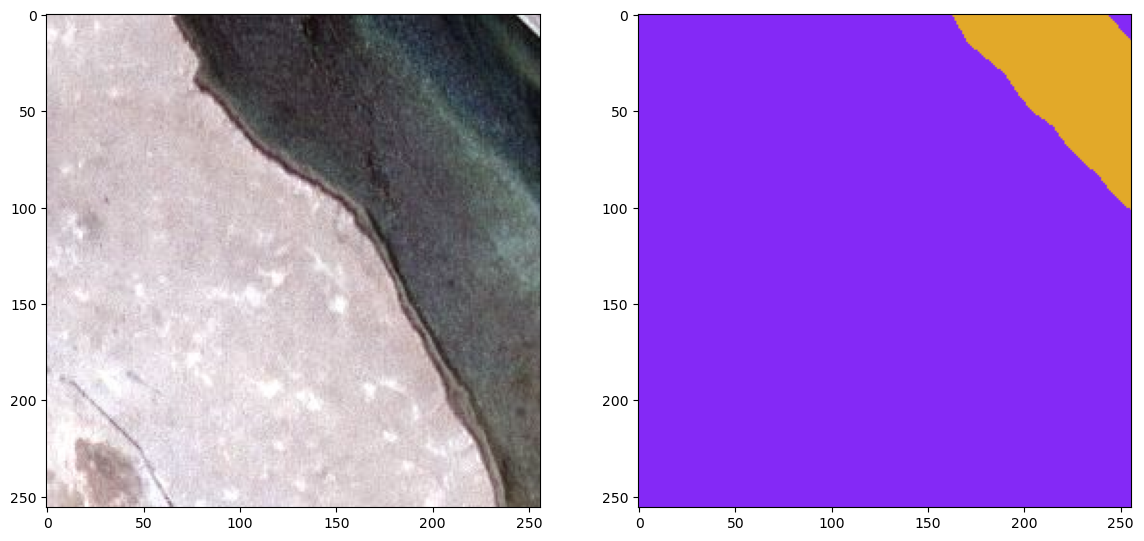

In [21]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

In [22]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)
     

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [23]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [24]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [25]:
labels[3]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [26]:
labels = np.expand_dims(labels, axis=3)
labels[0]


array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [27]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [28]:
print("Total unique labels based on masks: ",format(np.unique(labels)))


Total unique labels based on masks:  [0 1 2 3 4 5]


In [29]:
random_image_id = random.randint(0, len(image_dataset))


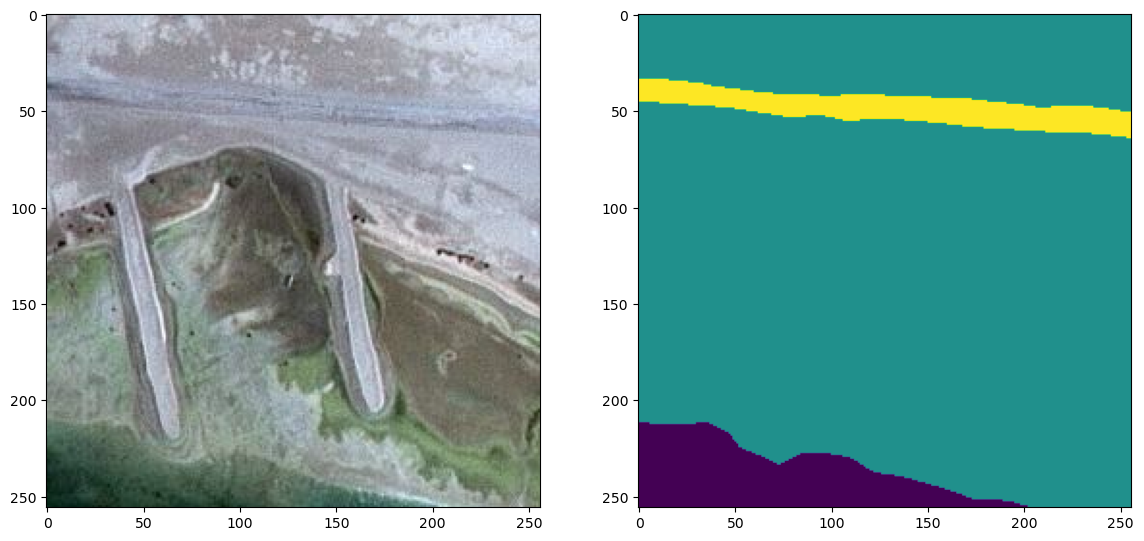

In [30]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [31]:
labels[0][:,:,0]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [32]:
total_classes = len(np.unique(labels))
total_classes

6

In [34]:
#!pip install tensorflow

from tensorflow.keras.utils import to_categorical 


  Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.16.2-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.64.1-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8

In [35]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
labels_categorical_dataset.shape



(945, 256, 256, 6)

In [36]:
master_trianing_dataset = image_dataset
master_trianing_dataset

array([[[[0.78823529, 0.76470588, 0.74509804],
         [0.88235294, 0.85882353, 0.83921569],
         [0.94509804, 0.90980392, 0.89411765],
         ...,
         [0.89411765, 0.85882353, 0.82352941],
         [0.85882353, 0.83137255, 0.79607843],
         [0.87843137, 0.85098039, 0.81568627]],

        [[0.88627451, 0.8627451 , 0.84313725],
         [0.99607843, 0.97254902, 0.95294118],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89803922, 0.8627451 ],
         [0.92941176, 0.90196078, 0.86666667],
         [0.95294118, 0.91764706, 0.88235294]],

        [[0.97254902, 0.94509804, 0.93333333],
         [1.        , 0.98823529, 0.97647059],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89411765, 0.86666667],
         [0.92156863, 0.89411765, 0.85882353],
         [0.90196078, 0.86666667, 0.83137255]],

        ...,

        [[0.88235294, 0.8627451 , 0.86666667],
         [0.81960784, 0.80392157, 0.8       ]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size = 0.5, random_state = 100)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(472, 256, 256, 3)
(473, 256, 256, 3)
(472, 256, 256, 6)
(473, 256, 256, 6)


In [39]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]


print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [40]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda    

In [41]:
from keras import backend as K

In [42]:
#The Jaccard coefficient, also known as the Jaccard index or Jaccard similarity coefficient, is a measure of the similarity between two sets. 
#It is defined as the size of the intersection divided by the size of the union of the sets.
def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    interection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value


In [43]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs
    

    c1 = Conv2D(16, (3,3), activation= "relu", kernel_initalizer= "he_normal" , padding ="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)
    
    
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)
    
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)
    
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)
    
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)
    
    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)
    
    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)
    
    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)
    
    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    return model
    


In [44]:
metrics = ["accuracy", jaccard_coef]


In [45]:

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [46]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(p1)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
total_classes = 5
image_height = 256
image_width = 256
image_channels = 1

def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes, 
                            image_height=image_height, 
                            image_width=image_width, 
                            image_channels=image_channels)

# Instantiate the model
model = get_deep_learning_model()
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 5)         │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,565 (10.02 KB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = get_deep_learning_model()


In [ ]:
#Generating Loss Function
#dice loss > Focal Loss > Total Loss
#Total Loss = (Dice loss + (1*Focal Loss))

In [ ]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]



In [ ]:
!pip uninstall segmentation_models

!pip install tensorflow==2.4.0 keras==2.3.1 segmentation_models
!pip install segmentation_models
!pip install --upgrade tensorflow
!pip install --upgrade keras
import segmentation_models as sm
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)


In [ ]:
#Model Compilation

In [ ]:
import tensorflow as tf


In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
